<a href="https://colab.research.google.com/github/KaanKirant/FaceMaskDetection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Face mask detection become one of the most important computer vision problem in 2020 when covid started. Detecting the individuals with or without mask in public areas become very important subject. One of the struggles in this problem is to detect face masks in an environment that is not very suitable for computer vision. The aim of this project is to detect face mask in darkened environment. To achieve this we are going to use feature extraction and machine learning.

**Project Aim and Objectives**


Face mask detection using computer vision techniques is to automatically detect whether a person in an image or video is wearing a face mask. This task has become even more important due to the COVID-19 pandemic and the need to implement public health safety such as wearing face masks in public spaces. If the environment is dark this task becomes more difficult. By using computer vision techniques such as feature extraction and image classification, face mask detection systems can accurately and efficiently identify individuals who do not comply with face mask regulations even in the environment that are not suitable for image detection.
The aim of this project is to detect people wearing masks even in environment that is difficult to detect the masks. And the objectives of this projects are:

*   Create the darkened, distorted and blurred dataset from the existing dataset that is given in the references. 
*   After the images are altered, the human faces from the images will be extracted.
*   To detect face masks we will use machine learning algorithms like  Random Forest and SVM and compare them based on accuracy.

**APPROACH**

Our approach is using a dataset containing people with and without masks. There are 853 images in the dataset, which belong to 3 different classes. These classes wear masks, don't wear masks, and don't wear masks correctly. We will use random 100 images that was choosen from the dataset to reduce the time consumption. These images will be darkened. For darkening the images OpenCV and NumPy libraries will be used. After the images altered we will use the annotations that were given in the dataset to extract the human faces in the images. For face mask detection we will use feature extrator GABOR filter and machine learning algorithms such as Random Forest and SVM. We will train and test the model with the altered images in our dataset. And compare these algorithms based on accuracy.

**Evaluation Protocol**

How do we know our solution will work?

We know that machine learning models can predict with high accuracy if the given data and features can cover the expected outcomes. The data we use rich and the feature extractor we use is one of the known methods in this field. Gabor is a linear filter which detect frequency in the images. Face masks can be easily detected by using this kind of filter.

How will we know how good it is?

We are going to use metrics from sklearn to find the accuracy and confusion matrix of the models. Also we are going to do an error analysis on the models to see the instances where the model predicted wrong label.

How will we compare multiple models?

We are going to compare the models based on accuracy and time consumption. 

What will we use as the baseline?

The expected accuracy for this project is to be above 70%. Anything below this considered failure.

Importing the Libaries.

In [ ]:
import numpy as np 
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
import gdown #For downloading the dataset from Google Drive
import shutil #Moving the cropped images to new folder
import random #For randomly selection wrong predictions for error analysis

Get the dataset from Google Drive.

In [ ]:
url = 'https://drive.google.com/file/d/12iT6IoCtcrkGqQUYwRr5xMqJa2OKJu4Y/view?usp=share_link' #URL link for the datasest
file_id = url.split('/')[-2] #Extracting the unique file id from the link
download_link = 'https://drive.google.com/uc?/export=download&id=' + file_id #Creating a download link from the unique file id
gdown.download(download_link) #Downloading the dataset
!unzip -o 'archive.zip' #Unzipping the dataset
!rm 'archive.zip' #After unzipping deleting the file

Downloading...
From: https://drive.google.com/uc?/export=download&id=12iT6IoCtcrkGqQUYwRr5xMqJa2OKJu4Y
To: /content/archive.zip
100%|██████████| 417M/417M [00:08<00:00, 47.3MB/s]


Archive:  archive.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotations/maksssksksss116.xml

Creating new directories to move certain number of images to use.

In [ ]:
!mkdir main_images #For main images that will be used
!mkdir main_annotations #For main annotations will be used
!mkdir main_images_dark #For the darkened images
number_of_images = 100 #Number of images that will be used to train and test

Moving the number of images and annotations that will be used to the new folders that was created

In [ ]:
for i in range(number_of_images):
  shutil.move("/content/images/maksssksksss"+str(i)+".png", "/content/main_images") #Moving the main images
  shutil.move("/content/annotations/maksssksksss"+str(i)+".xml", "/content/main_annotations") #Moving the main annotations

We need to darken the images to get the dataset that we want which is images in darkened enviroment

In [ ]:
#This code was from lectures.
def rand_tfm(im, tfm, p=1): #Function for darkening the images
    if np.random.random() < p:
        im_copy = im.copy()
        return tfm(im_copy)
    return im
def dark_tfm(im): return (0.3*im).astype(im.dtype)

Funciton to show images.

In [ ]:
#This code was from lectures
def show_img(im, ax=None, figsize=(8,8)): #Function for showing the images
    if not ax: _,ax = plt.subplots(1,1,figsize=figsize) 
    if len(im.shape)==2: im = np.tile(im[:,:,None], 3) 
    ax.imshow(im[:,:,::-1]);
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    return ax

Showing the first image in the dataset and their darkened version

In [ ]:
img = cv2.imread('main_images/maksssksksss0.png') #Reading the image
img_tfm = rand_tfm(img, dark_tfm, p=1) #Darkening the image

<Axes: >

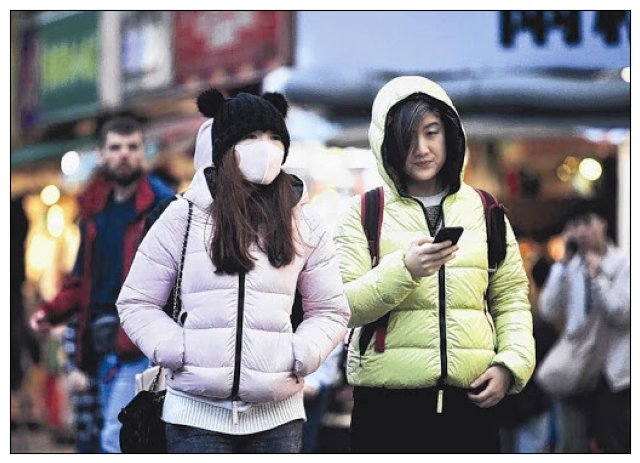

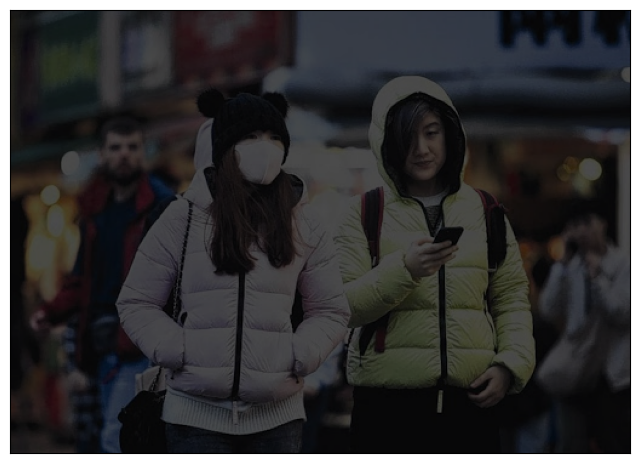

In [ ]:
show_img(img) #Original image
show_img(img_tfm) #Darkened image

After testing our algorithm works on one image we need to implement to the number of images we are going to use and move them to a different folder.

In [ ]:
for i in range(number_of_images):
  img_name = "maksssksksss" + str(i) + ".png" #Naming the darkened image file
  image_filepath = '../content/main_images/' + img_name #Getting the original image
  image = cv2.imread(image_filepath) #Reading the original image
  image_tfm = rand_tfm(image, dark_tfm, p=1) #Implementing the darkening function to the original image
  cv2.imwrite('../content/main_images_dark/' +img_name, image_tfm) #Moving the darkened image to a new folder

Creating path variables to the folders that we are going to use

In [ ]:
image_dir = '../content/main_images'
dark_image_dir = '../content/main_images_dark'
xml_dir = '../content/main_annotations'
images_files = !ls '../content/main_images'
xml_files = !ls '../content/main_annotations'

Get the image information from xml files. First we download the libaries that we need.

In [ ]:
import glob
from xml.etree import ElementTree

Start to get the information. This code is from the user "stpete_ishii" on Kaggle.

In [ ]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []} #Information we are extracting from the files

for annotation in glob.glob(xml_dir + '/*.xml'):
  
    tree = ElementTree.parse(annotation)
    
    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))    

        if 'object' in element.tag:
            for attribute in list(element):
                
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height] 
                    information['file'] += [annotation.split('/')[-1][0:-4]] 
                            
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]
                  #These values are the locations of the faces in the image. We are going to use this coordinates to crop the faces and move them to a different folder.

Creating a dataframe with the xml informations of the images.

In [ ]:
xml_info_df = pd.DataFrame(information)
xml_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,75,271,152,385,with_mask,maksssksksss8,301,400
1,214,54,291,132,with_mask,maksssksksss80,400,226
2,43,139,80,182,with_mask,maksssksksss44,400,226
3,140,93,188,148,with_mask,maksssksksss44,400,226
4,261,47,321,120,with_mask,maksssksksss44,400,226
5,332,12,394,90,without_mask,maksssksksss44,400,226
6,145,93,280,241,with_mask,maksssksksss69,400,351
7,188,74,241,131,with_mask,maksssksksss23,400,299
8,163,88,251,185,with_mask,maksssksksss27,400,312
9,24,24,47,52,with_mask,maksssksksss36,400,225


<Axes: xlabel='label', ylabel='count'>

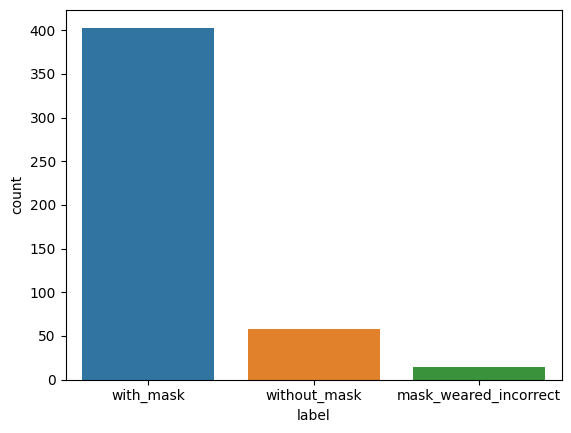

In [ ]:
sns.countplot(x=xml_info_df.label)

Adding the xml and image file names to the dataframe

In [ ]:
xml_info_df['annotation_file'] = xml_info_df['file'] + '.xml'
xml_info_df['image_file'] = xml_info_df['file'] + '.png'

In [ ]:
xml_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,75,271,152,385,with_mask,maksssksksss8,301,400,maksssksksss8.xml,maksssksksss8.png
1,214,54,291,132,with_mask,maksssksksss80,400,226,maksssksksss80.xml,maksssksksss80.png
2,43,139,80,182,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png
3,140,93,188,148,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png
4,261,47,321,120,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png
...,...,...,...,...,...,...,...,...,...,...
470,187,83,212,109,with_mask,maksssksksss97,301,400,maksssksksss97.xml,maksssksksss97.png
471,68,42,105,69,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png
472,154,47,178,74,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png
473,238,34,262,69,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png


Crop the faces on the images and move them to a different folder.

In [ ]:
!mkdir cropped_images

In [ ]:
!ls './'

annotations	images		  main_images	    sample_data
cropped_images	main_annotations  main_images_dark


For now we are going to give the same name to the cropped images as the file name.

In [ ]:
xml_info_df['cropped_image_file'] = xml_info_df['file'] 
xml_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,75,271,152,385,with_mask,maksssksksss8,301,400,maksssksksss8.xml,maksssksksss8.png,maksssksksss8
1,214,54,291,132,with_mask,maksssksksss80,400,226,maksssksksss80.xml,maksssksksss80.png,maksssksksss80
2,43,139,80,182,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png,maksssksksss44
3,140,93,188,148,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png,maksssksksss44
4,261,47,321,120,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png,maksssksksss44
...,...,...,...,...,...,...,...,...,...,...,...
470,187,83,212,109,with_mask,maksssksksss97,301,400,maksssksksss97.xml,maksssksksss97.png,maksssksksss97
471,68,42,105,69,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png,maksssksksss2
472,154,47,178,74,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png,maksssksksss2
473,238,34,262,69,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png,maksssksksss2


Cropping the faces from the images by using the infomation on the annotations.

In [ ]:
for i in range(len(xml_info_df)):
    # Get The File Path and Read The Image
    image_filepath = '../content/main_images_dark/' + xml_info_df['image_file'].iloc[i]
    image = cv2.imread(image_filepath)
    
    # Set The Cropped Image File Name
    xml_info_df['cropped_image_file'].iloc[i] = xml_info_df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
    cropped_image_filename = xml_info_df['cropped_image_file'].iloc[i]
    
    # Get The xmin, ymin, xmax, ymax Value (Bounding Box) to Crop Image
    xmin = xml_info_df['xmin'].iloc[i]
    ymin = xml_info_df['ymin'].iloc[i]
    xmax = xml_info_df['xmax'].iloc[i]
    ymax = xml_info_df['ymax'].iloc[i]

    # Crop The Image Based on The Values Above
    cropped_image = image[ymin:ymax, xmin:xmax]
    
    # Save Cropped Image
    cv2.imwrite('../content/cropped_images/' +cropped_image_filename, cropped_image)

<ipython-input-20-601e730e7949>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xml_info_df['cropped_image_file'].iloc[i] = xml_info_df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'


Latest version of the dataframe.

In [ ]:
xml_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,75,271,152,385,with_mask,maksssksksss8,301,400,maksssksksss8.xml,maksssksksss8.png,maksssksksss8-0.png
1,214,54,291,132,with_mask,maksssksksss80,400,226,maksssksksss80.xml,maksssksksss80.png,maksssksksss80-1.png
2,43,139,80,182,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png,maksssksksss44-2.png
3,140,93,188,148,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png,maksssksksss44-3.png
4,261,47,321,120,with_mask,maksssksksss44,400,226,maksssksksss44.xml,maksssksksss44.png,maksssksksss44-4.png
...,...,...,...,...,...,...,...,...,...,...,...
470,187,83,212,109,with_mask,maksssksksss97,301,400,maksssksksss97.xml,maksssksksss97.png,maksssksksss97-470.png
471,68,42,105,69,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png,maksssksksss2-471.png
472,154,47,178,74,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png,maksssksksss2-472.png
473,238,34,262,69,with_mask,maksssksksss2,400,290,maksssksksss2.xml,maksssksksss2.png,maksssksksss2-473.png


First 10 files in the cropped_images folder.

In [ ]:
cropped_images_files = !ls './cropped_images'
cropped_images_files[:10]

['maksssksksss0-195.png\tmaksssksksss46-331.png\tmaksssksksss73-429.png',
 'maksssksksss0-196.png\tmaksssksksss46-332.png\tmaksssksksss74-169.png',
 'maksssksksss0-197.png\tmaksssksksss46-333.png\tmaksssksksss74-170.png',
 'maksssksksss10-238.png\tmaksssksksss46-334.png\tmaksssksksss74-171.png',
 'maksssksksss11-66.png\tmaksssksksss46-335.png\tmaksssksksss74-172.png',
 'maksssksksss11-67.png\tmaksssksksss46-336.png\tmaksssksksss74-173.png',
 'maksssksksss11-68.png\tmaksssksksss46-337.png\tmaksssksksss74-174.png',
 'maksssksksss11-69.png\tmaksssksksss47-104.png\tmaksssksksss74-175.png',
 'maksssksksss11-70.png\tmaksssksksss48-105.png\tmaksssksksss74-176.png',
 'maksssksksss11-71.png\tmaksssksksss49-29.png\tmaksssksksss74-177.png']

Splitting the dataframe to training and testing. The dataset will be split 80% training and 20% testing.

In [ ]:
test_df = xml_info_df[:int(len(xml_info_df) * .20)]
train_df = xml_info_df[int(len(xml_info_df) * .20):]
train_df.shape, test_df.shape

((380, 11), (95, 11))

Moving the images and their labels to an array and change the image size to 128 to make sure every image has the same size.

In [ ]:
SIZE = 128 #Image size
train_images = [] #Empty array for training images
train_label = [] #Empty array for labels
for i in range(len(train_df)):
  img_path = '../content//cropped_images/' + train_df['cropped_image_file'].iloc[i] #Reading the images
  image = cv2.imread(img_path,cv2.IMREAD_COLOR)
  image = cv2.resize(image,(SIZE,SIZE)) #Resizing the image to the image size we chose above
  label = train_df['label'].iloc[i] #Getting the label of the image
  train_images.append(image) #Adding images to an array
  train_label.append(label) #Adding labels to a different array


Changing arrays to numpy arrays and check their shape.

In [ ]:
train_images = np.array(train_images)
train_label = np.array(train_label)
train_images.shape, train_label.shape

((380, 128, 128, 3), (380,))

Doing the same adjustment to the test dataset. Move the images to an array and their labels to a different array. 

In [ ]:
test_images = []
test_label = []
for i in range(len(test_df)):
  img_path = '../content//cropped_images/' + test_df['cropped_image_file'].iloc[i]
  image = cv2.imread(img_path,cv2.IMREAD_COLOR)
  image = cv2.resize(image,(SIZE,SIZE))
  label = test_df['label'].iloc[i]
  test_images.append(image)
  test_label.append(label)

Changing the arrays to numpy arrays and check the shape of the arrays.

In [ ]:
test_images = np.array(test_images)
test_label = np.array(test_label)
test_images.shape, test_label.shape

((95, 128, 128, 3), (95,))

We need to change the labels to integers because the computer does not understand "with_mask", "without_mask" or "mask_weared_incorrectly". These labels will turned in to 0,1,2 using label encoder from sklearn libary.

In [ ]:
from sklearn import preprocessing #Importing the libary 
label_encoder = preprocessing.LabelEncoder() #Creating the label encoder

label_encoder.fit(train_label) #Fitting the label encoder with training labels
train_label_encode = label_encoder.transform(train_label) #Transforming the labels and moving them to a different varaible.

label_encoder.fit(test_label) #Fitting the label encoder with test labels
test_label_encode = label_encoder.transform(test_label) #Transforming the labels and moving them to a different varaible.

Naming the variables to names that usually used in machine learning.

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_label_encode, test_images, test_label_encode

Normalize pixel values to between 0 and 1

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

**Feature Extraction**

For feature extraction we are going to use GABOR feature extraction and pixel values. Gabor is a filter that is used in image processing. And it is used for edge detection. Gabor filter is a bandpass filter. 

Gabor filter looks for frequency in the images. The formula for the gabor filter looks like this: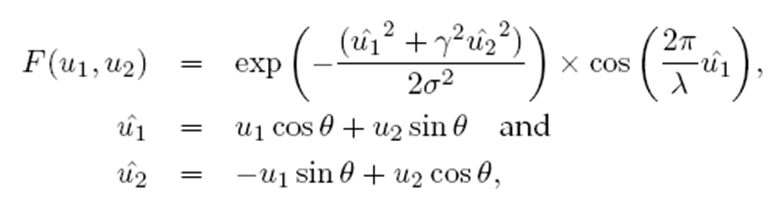

Implementing this formula and add it's results to the dataframe we have.

This code is from [this github user](https://github.com/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial83_feature_extraction_RF_classification_V2.0.py).

In [ ]:
def feature_extraction(dataset):
  image_dataset = pd.DataFrame()
  for img in range(dataset.shape[0]):
    df = pd.DataFrame()
    input_img = dataset[img,:,:,:]
    image = input_img

    pixel_values = image.reshape(-1) #Getting the pixel values for the images
    df['Pixel Values'] = pixel_values #Adding the pixel values of the image to the dataframe

    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []
    for theta in range(2):   #Define number of thetas
        theta = theta / 4. * np.pi
        for sigma in (1, 3):  #Sigma with 1 and 3
            lamda = np.pi/4
            gamma = 0.5
            gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
            ksize=9
            kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
            kernels.append(kernel)
            #Now filter the image and add values to a new column 
            fimg = cv2.filter2D(image, cv2.CV_8UC3, kernel)
            filtered_img = fimg.reshape(-1)
            df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
            num += 1  #Increment for gabor column label

    image_dataset = image_dataset.append(df)
  return image_dataset

Running the feature extraction function on our training dataset. (This part is the reason why we had to take the first 100 images because it would take a lot of time to extract features from a larger dataset.

In [ ]:
image_features = feature_extraction(x_train) 

<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

Adjusting our training dataset to run Random Forest and SVM models on it.

In [ ]:
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis = 0) #Adjusting the training dataset to run machine learning algorithms on it.
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1)) #Reshaping the training dataset to run machine learning algorithms on it.
X_for_RF.shape, y_train.shape

((380, 245760), (380,))

Importing Random Forest model and implementing the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Importing the libary
RF_model = RandomForestClassifier(n_estimators=50, random_state=42)
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

Adjusting our test dataset the same way we did it for training model.

In [ ]:
test_features = feature_extraction(x_test)
test_features = np.expand_dims(test_features, axis=0) #Adjusting the test dataset
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1)) #Adjusting the test dataset

<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
<ipython-input-31-5b466957b564>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

Predicting the label using Random Forest and changing our labels to their original version.

In [ ]:
test_prediction = RF_model.predict(test_for_RF) #Predicting using Random Forest
test_prediction = label_encoder.inverse_transform(test_prediction) #Transfoming the labels to get original label back. 

Importing metrics from sklearn to check the accuracy.

In [ ]:
from sklearn import metrics #Importing the libary
accuracy =  metrics.accuracy_score(test_label, test_prediction) #Getting the accuracy
print ("Accuracy = ", round(accuracy,4)*100,"%") #Printing the accuracy

Accuracy =  92.63 %


Getting the confusion matrix.

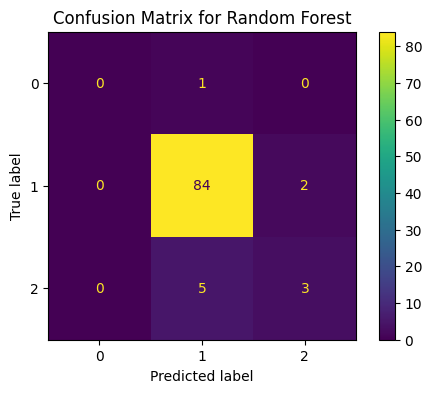

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix(test_label, test_prediction), display_labels=RF_model.classes_)
ax.set(title='Confusion Matrix for Random Forest')
display.plot(ax=ax);

**Error Analysis**

For error analysis we are going the put the images that were predicted incorrectly to a list. (We are putting the number that they are represented in the actual test dataset not the image itself)

In [ ]:
wrong_predictions = [] #Empty list for wrong predictions
for i in range(0,test_prediction.shape[0]-1): #Looping the predictions
  img = x_test[i]
  labels = label_encoder.inverse_transform(y_test)
  pretiction = test_prediction[i]
  if labels[i] != test_prediction[i]: #Checking if the label matches the predicted label
    wrong_predictions.append(i)

We are going to show only five random wrong prediction. The accuracy usually around 80% which means there is 20 images that were predicted incorrectly. This would be too many images to show. This is why we are only showing five random wrong predictions.

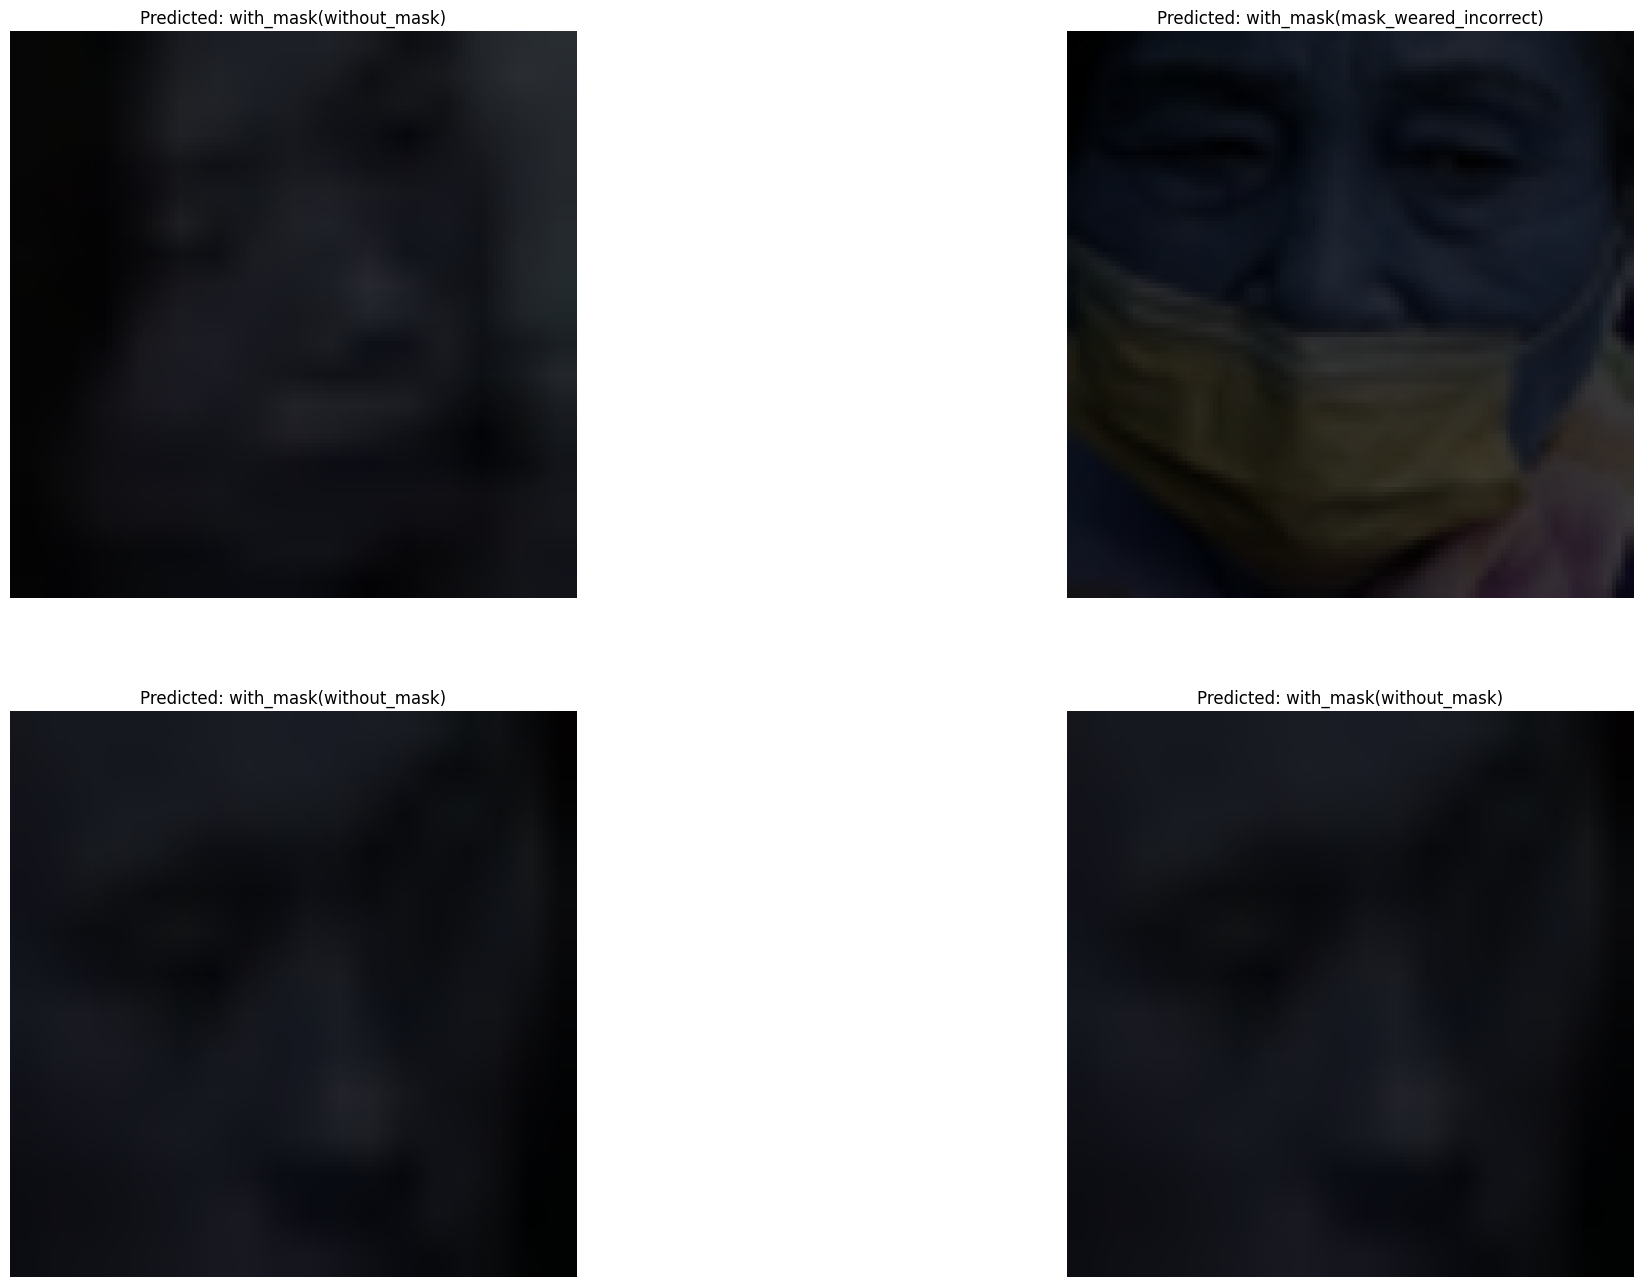

In [ ]:
fig = plt.figure(num=None, figsize=(25, 25))  #Creating figure
i=1

for i in range(1,5):
  n=random.randint(0, len(wrong_predictions)-1) #Getting random image from the wrong predictions list
  img = x_test[wrong_predictions[n]]
  labels = label_encoder.inverse_transform(y_test)
  plt.subplot(3, 2, i)
  plt.title('Predicted: ' + test_prediction[wrong_predictions[n]]  + '(' + labels[wrong_predictions[n]]+ ')') #The title of the images is prediction with correct label in parentheses.
  plt.axis('off')
  plt.imshow(img, cmap='gray') 
  i += 1
plt.show()

Importing SVM and implementing the model.

In [ ]:
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(X_for_RF, y_train)

SVC(decision_function_shape='ovo')

Predicting with SVM model.

In [ ]:
test_prediction_SVM = SVM_model.predict(test_for_RF) #Predicting using SVM
test_prediction_SVM = label_encoder.inverse_transform(test_prediction_SVM) #Transfoming the labels to get original label back. 

Cheking the accuracy for the SVM model.

In [ ]:
accuracy =  metrics.accuracy_score(test_label, test_prediction_SVM) #Getting the accuracy
print ("Accuracy = ", round(accuracy,4)*100,"%") #Printing the accuracy

Accuracy =  91.58 %


Confusion matrix for SVM model.

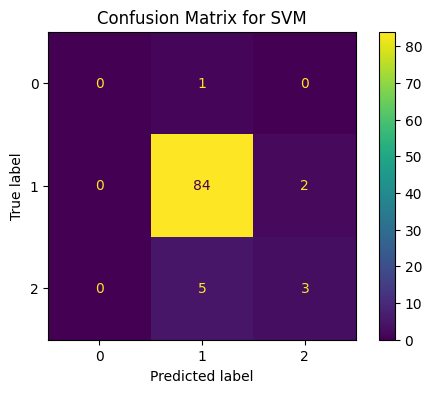

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
display = ConfusionMatrixDisplay(confusion_matrix(test_label, test_prediction_SVM), display_labels=SVM_model.classes_)
ax.set(title='Confusion Matrix for SVM')
display.plot(ax=ax);

**Error Analysis**

We are doing the same things we did with Random Forest model. Putting the wrong predictions to a different list and picking random 5 from the list.

In [ ]:
wrong_predictions_SVM = [] #Empty list for wrong predictions
for i in range(0,test_prediction_SVM.shape[0]-1): #Looping the predictions
  img = x_test[i]
  labels = label_encoder.inverse_transform(y_test)
  pretiction = test_prediction_SVM[i]
  if labels[i] != test_prediction_SVM[i]: #Checking if the label matches the predicted label
    wrong_predictions_SVM.append(i)

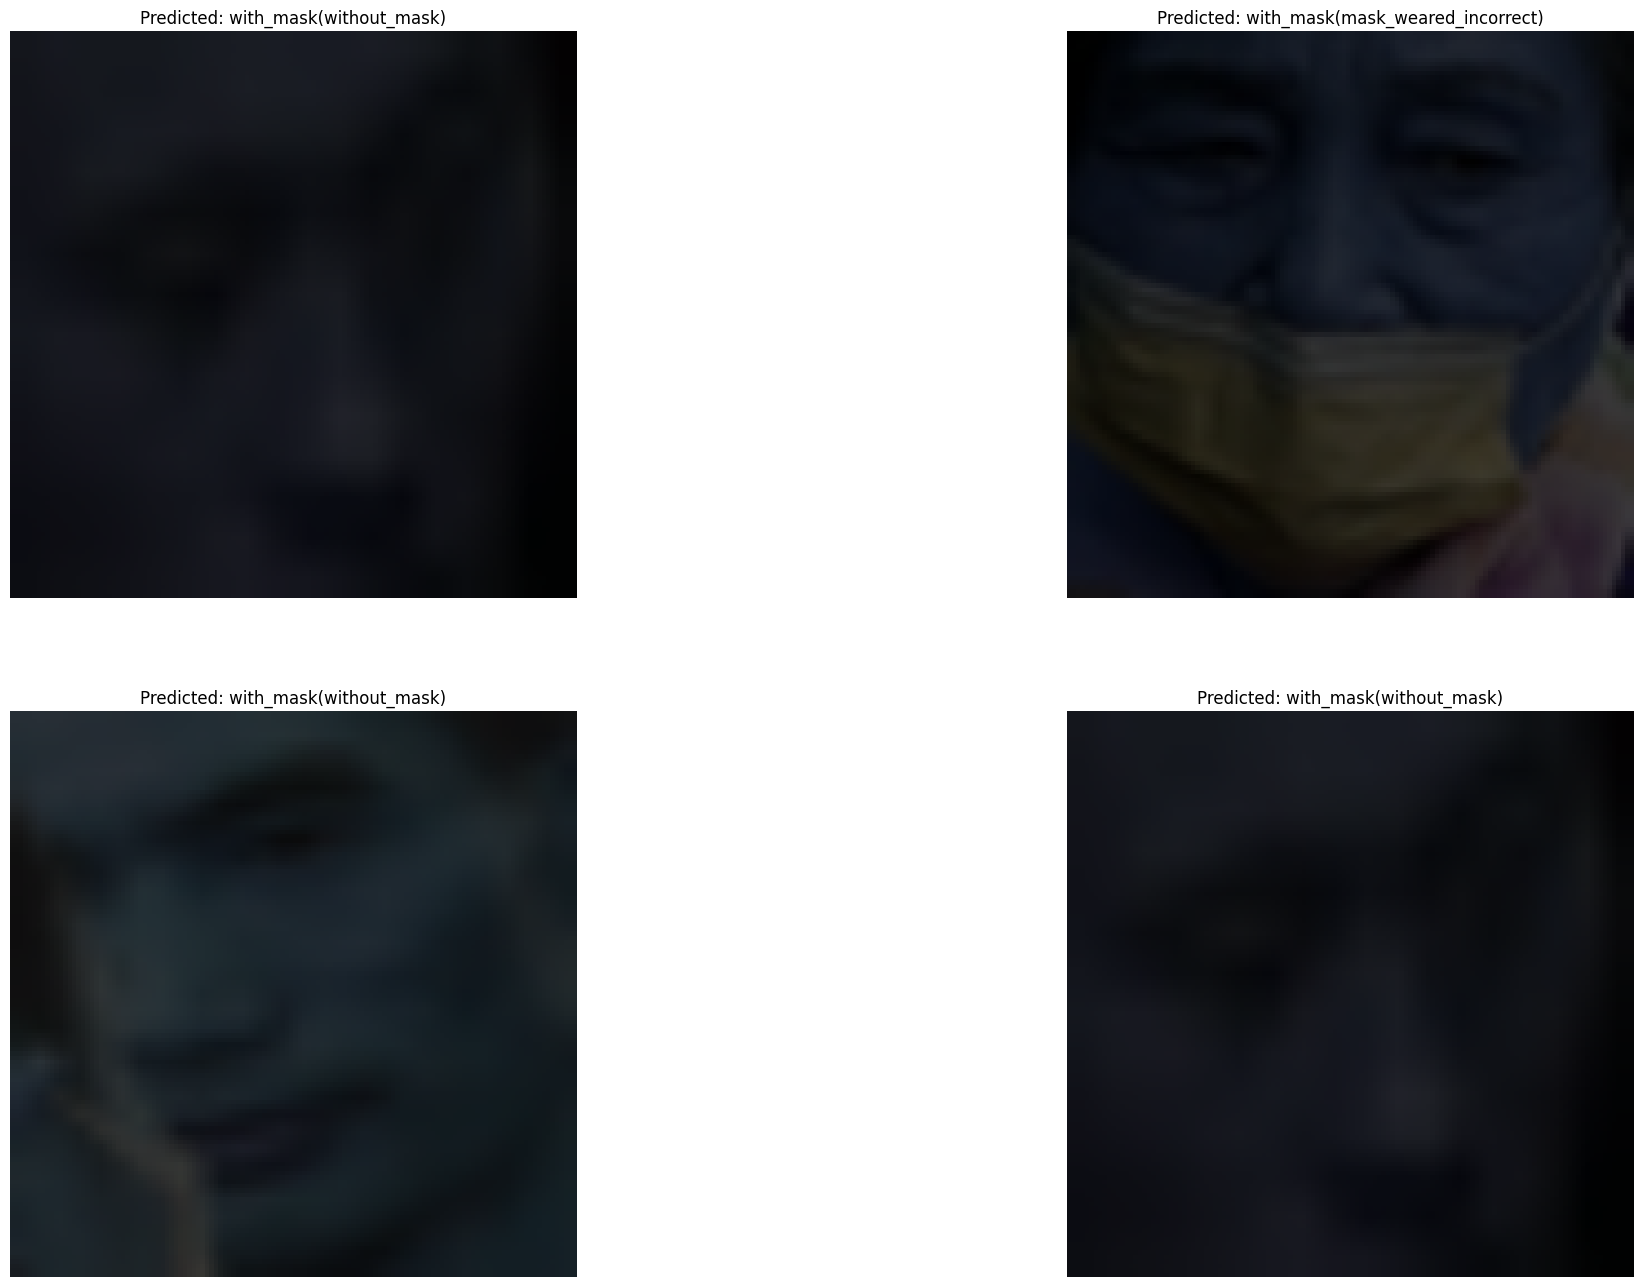

In [ ]:
fig = plt.figure(num=None, figsize=(25, 25))  #Creating figure
i=1

for i in range(1,5):
  n=random.randint(0, len(wrong_predictions_SVM)-1) #Getting random image from the wrong predictions list
  img = x_test[wrong_predictions_SVM[n]]
  labels = label_encoder.inverse_transform(y_test)
  plt.subplot(3, 2, i)
  plt.title('Predicted: ' + test_prediction_SVM[wrong_predictions_SVM[n]]  + '(' + labels[wrong_predictions_SVM[n]]+ ')') #The title of the images is prediction with correct label in parentheses.
  plt.axis('off')
  plt.imshow(img, cmap='gray') 
  i += 1
plt.show()

**Results**

The results of Random Forest and SVM was very similar when we compare the accuracy and confusion matrix. The main difference was time consumption. SVM took more time to build the model. Because of this Random Forest would be a better use for this project.